In [1]:
# import the dependency
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
from pathlib import Path
import matplotlib as plot
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import pymongo

In [2]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
db= client.commerce_db
collection = db.items

In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
# url of page to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [6]:
table = pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
type(table)

list

In [8]:
df = table[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

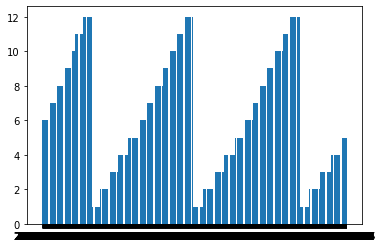

In [10]:
datay= df["terrestrial_date"]
datax=df["month"]

plt.bar(datay,datax)
plt.show()

How many months exist on Mars?

How many Martian days exist in the scraped data?

In [11]:
df["sol"].count

<bound method Series.count of 0         10
1         11
2         12
3         13
4         14
        ... 
1862    1973
1863    1974
1864    1975
1865    1976
1866    1977
Name: sol, Length: 1867, dtype: int64>

1977 days exist in the data.

What are the coldest and warmest months on Mars?

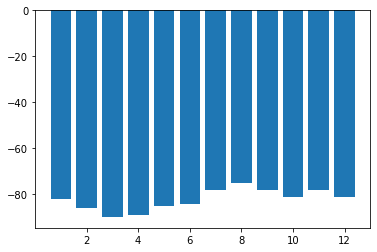

In [12]:
datax= df["min_temp"]
datay=df["month"]

plt.bar(datay,datax)
plt.show()

The warmest month is August, or the 8th month and the coldest is March or the 3rd month.

Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

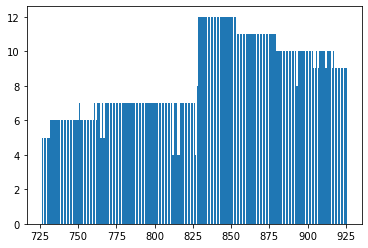

In [13]:
datay= df["pressure"]
datax=df["month"]

plt.bar(datay,datax)
plt.show()

About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

In [14]:
# Export to csv

In [15]:
filepath=Path('Desktop/GitRepo/web-scraping-challenge/Mission_to_Mars/Marsweather.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)

In [16]:
df.to_csv("Desktop/GitRepo/web-scraping-challenge/Mission_to_Mars/Marsweather.csv")